In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
from utils.helper_functions import * 

dirnames = ["Asia", "Europe", "North_America" ]
ref_sets_A = ["Maharashtra", "Maharashtra_nearby_states","India", "Asia", "Global_next_regions"]
ref_sets_E = ["Netherlands", "Netherlands_nearby_countries","Europe", "Global_next_regions"]
ref_sets_NA = ["Connecticut", "Connecticut_nearby_states", "USA",  "North_America", "Global_next_regions"]

allele_freqs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ref_sets = [ref_sets_A, ref_sets_E, ref_sets_NA]
abundances = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]


produce result files

In [26]:

for dir, ref in zip(dirnames, ref_sets):
    output_results_to_json_3_dirs(dir,"0.0", ref, allele_freqs, abundances, "B.1.1.7_sequence")

read results

In [3]:
results = dict()

for continent in dirnames: 
    results[continent] = dict()
    # load results
    with open("results_{}.json".format(continent)) as json_file:
        results[continent] = json.loads(json_file.read())


calculate absolute errors

In [4]:
ref_sets_dict = dict()

for continent, ref_set_list in zip(dirnames, ref_sets):
    ref_sets_dict[continent] = ref_set_list

absolute_errors = calculate_absolute_errors_af(results, allele_freqs, abundances, ref_sets_dict, dirnames)

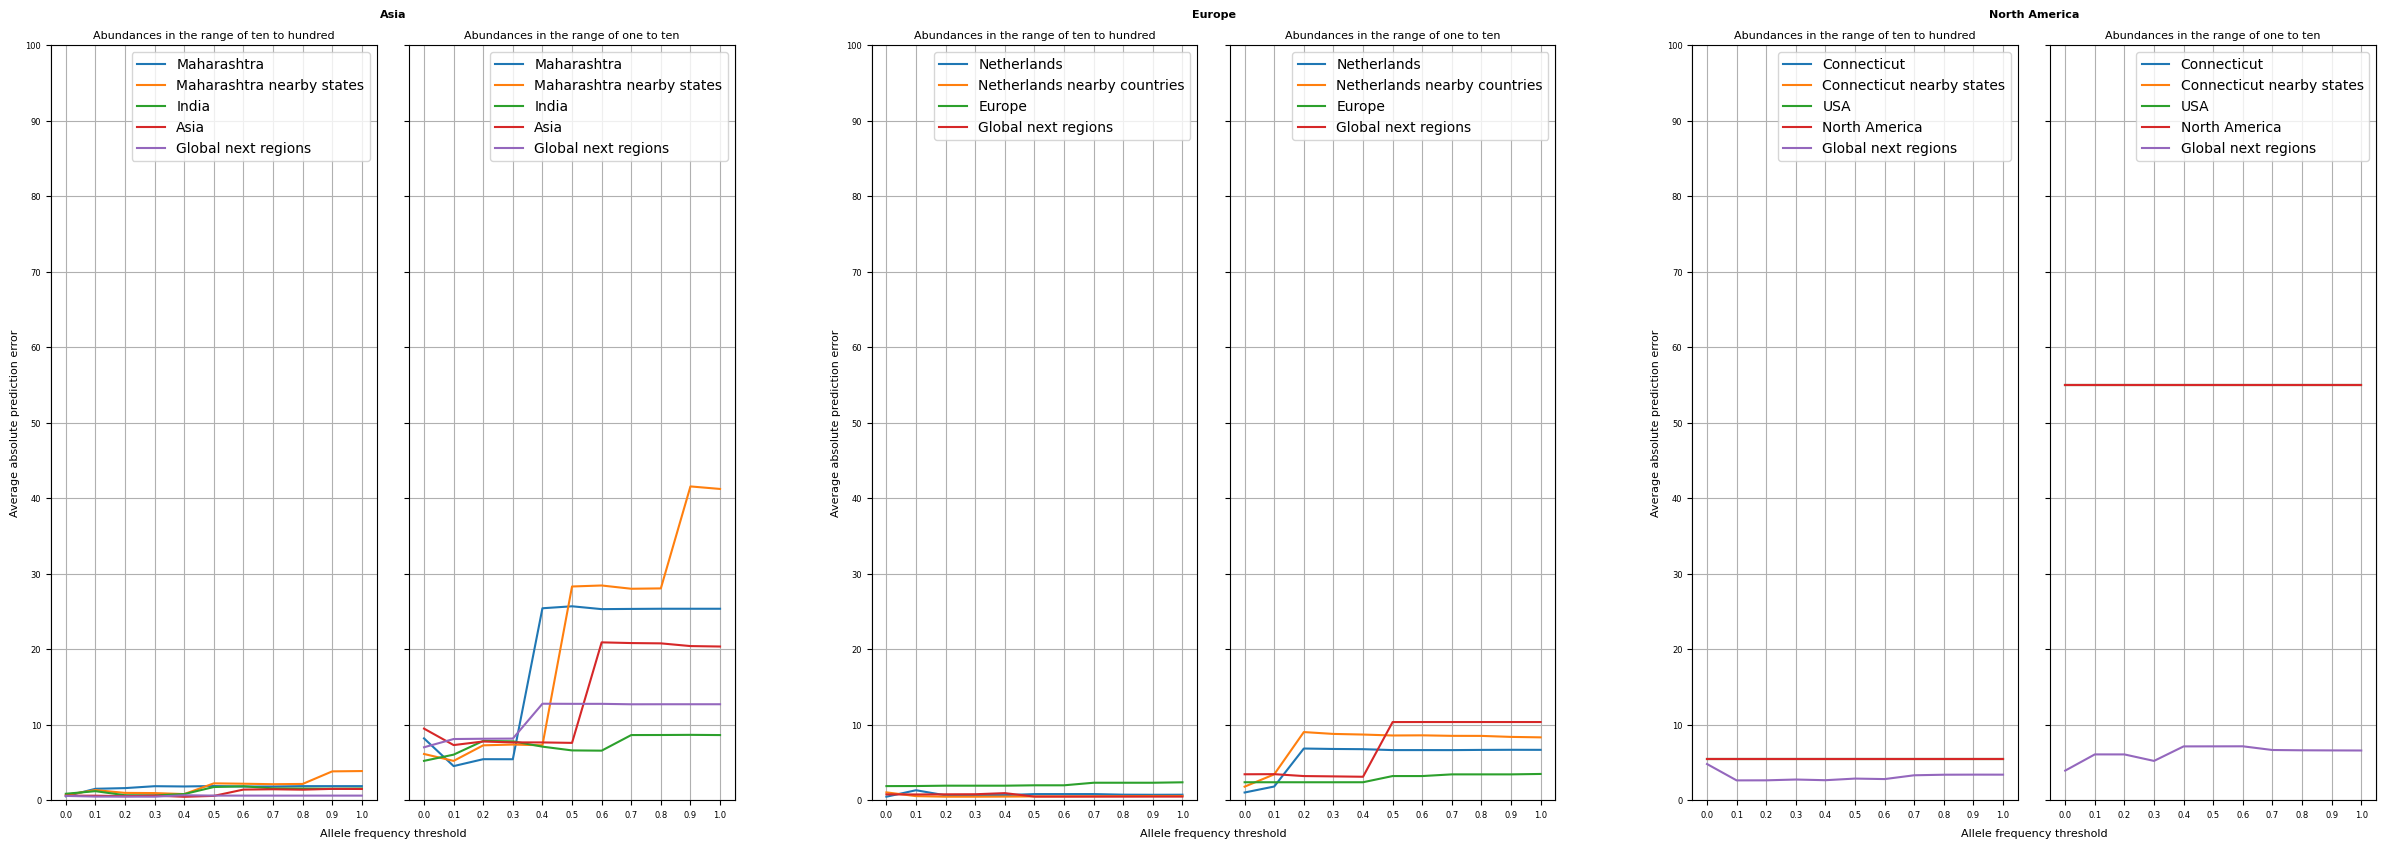

In [84]:
from utils.plotting_functions import *
if os.path.isdir("figures") != True:
    os.mkdir("figures")


plot_with_line_plots_two_scales(dirnames, ref_sets_dict, absolute_errors, "figures", allele_freqs)